In [2]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import pandas as pd

In [4]:
%ls

Untitled.ipynb        middle-east.geo.json


In [6]:
middle_east = gpd.read_file("middle-east.geo.json")

In [8]:
middle_east.head()

,continent,country-abbrev,geometry,hc-a2,hc-group,hc-key,hc-middle-x,hc-middle-y,id,iso-a2,iso-a3,labelrank,name,region-wb,subregion,woe-id
0,Asia,Saud.,"(POLYGON ((3825 2092, 3877 2080, 3916 2050, 38...",SA,admin0,sa,0.45,0.49,SA,SA,SAU,2,Saudi Arabia,Middle East & North Africa,Western Asia,23424938
1,Asia,Bahr.,"POLYGON ((6245 4841, 6284 4824, 6269 4705, 623...",BH,admin0,bh,0.45,0.50,BH,BH,BHR,4,Bahrain,Middle East & North Africa,Western Asia,23424753
2,Asia,Tur.,"(POLYGON ((-641 9203, -696 9183, -725 9193, -6...",TR,admin0,tr,0.38,0.49,TR,TR,TUR,2,Turkey,Europe & Central Asia,Western Asia,23424969
3,Asia,Oman,"(POLYGON ((8540 3050, 8537 3104, 8576 3137, 86...",OM,admin0,om,0.60,0.51,OM,OM,OMN,4,Oman,Middle East & North Africa,Western Asia,23424898
4,Asia,Iran,"(POLYGON ((4640 8219, 4650 8268, 4584 8317, 45...",IR,admin0,ir,0.52,0.52,IR,IR,IRN,2,Iran,Middle East & North Africa,Southern Asia,23424851


In [10]:
%matplotlib inline

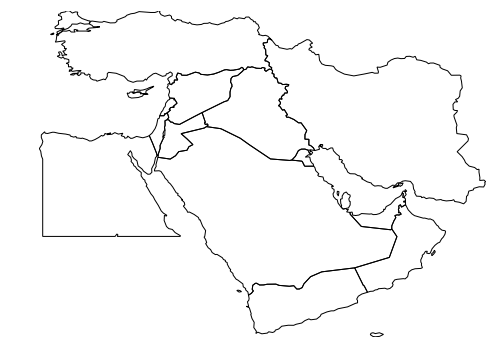

In [11]:
gplt.polyplot(middle_east)

In [55]:
middle_east = middle_east[~middle_east['name'].isin(['Cyprus', 'Northern Cyprus', 'Turkey', 'Israel'])]

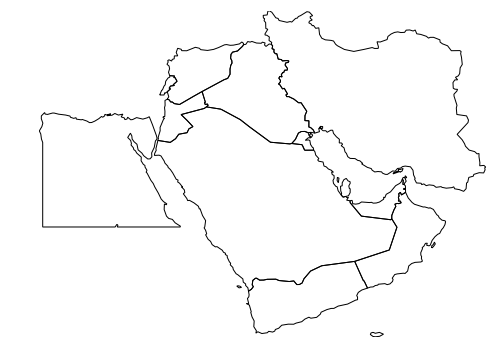

In [56]:
gplt.polyplot(middle_east)

In [57]:
# The tiers are very fluid. Some parts of the government portals may be in English, some may not be in English.
# Hence in practice we will only make a distinction between publishes data and not publishes data.
tiers = {
    'Saudi Arabia': 2,
    'Bahrain': 3,
    'Oman': 3,
    'Iran': 1,
    'Yemen': 1,
    'Kuwait': 3,
    'Egypt': 3,
    'Jordan': 2,
    'Iraq': 1,
    'Qatar': 3,
    'United Arab Emirates': 3,
    'Syria': 2,
    'Lebanon': 2,
}

In [58]:
middle_east['Open Data Tier'] = [value if value != 2 else 1 for value in tiers.values()]

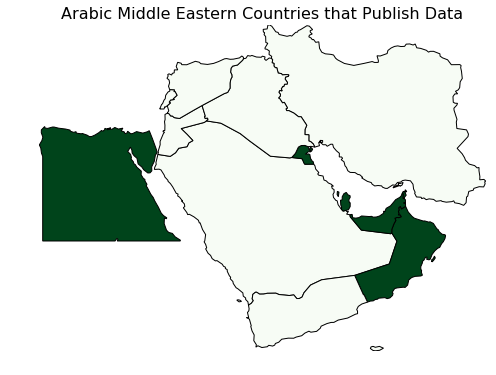

In [61]:
ax = gplt.choropleth(middle_east, hue='Open Data Tier', cmap='Greens')
ax.set_title("Arabic Middle Eastern Countries that Publish Data", fontsize=16)